In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# 2. Load and Inspect the Dataset

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Career Stats Analysis\Total_Career_Stats.csv')  # Replace with your actual file path

# Display the first few rows
print(data.head())

# Display summary statistics
print(data.describe())


  player_name  career_kills  career_wins  career_revives
0      xoKaiz      351847.0      12109.0         16901.0
1     Upthrow      287983.0      19846.0         61712.0
2      Tollis      269662.0      16175.0         27939.0
3  Forget Dat      263062.0      15627.0         27177.0
4    iMarshTV      235493.0      16196.0         19687.0
        career_kills   career_wins  career_revives
count    2901.000000   2901.000000     2901.000000
mean   102952.881075   6581.510169    13613.296105
std     32804.661124   2319.328748     4550.347994
min       799.000000    810.000000     3753.000000
25%     83895.000000   5203.000000    11049.000000
50%     94538.000000   6096.000000    12665.000000
75%    111925.000000   7436.000000    14829.000000
max    384461.000000  23953.000000    67615.000000


# 3. Data Cleaning and Preparation

In [3]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)


player_name       1
career_kills      0
career_wins       0
career_revives    0
dtype: int64
player_name        object
career_kills      float64
career_wins       float64
career_revives    float64
dtype: object


# 4. Exploratory Data Analysis (EDA)

## 4.1. Descriptive Statistics

In [4]:
# Calculate descriptive statistics
desc_stats = data[['career_kills', 'career_wins', 'career_revives']].describe()
print(desc_stats)


        career_kills   career_wins  career_revives
count    2901.000000   2901.000000     2901.000000
mean   102952.881075   6581.510169    13613.296105
std     32804.661124   2319.328748     4550.347994
min       799.000000    810.000000     3753.000000
25%     83895.000000   5203.000000    11049.000000
50%     94538.000000   6096.000000    12665.000000
75%    111925.000000   7436.000000    14829.000000
max    384461.000000  23953.000000    67615.000000


## 4.2. Correlation Analysis

In [5]:
# Pearson Correlation between Career Kills and Career Wins
corr_kills_wins, p_value_kills_wins = pearsonr(data['career_kills'], data['career_wins'])
print(f"Pearson Correlation between Career Kills and Career Wins: {corr_kills_wins:.4f} (p-value: {p_value_kills_wins:.4f})")

# Pearson Correlation between Career Kills and Career Revives
corr_kills_revives, p_value_kills_revives = pearsonr(data['career_kills'], data['career_revives'])
print(f"Pearson Correlation between Career Kills and Career Revives: {corr_kills_revives:.4f} (p-value: {p_value_kills_revives:.4f})")

# Pearson Correlation between Career Wins and Career Revives
corr_wins_revives, p_value_wins_revives = pearsonr(data['career_wins'], data['career_revives'])
print(f"Pearson Correlation between Career Wins and Career Revives: {corr_wins_revives:.4f} (p-value: {p_value_wins_revives:.4f})")


Pearson Correlation between Career Kills and Career Wins: 0.7997 (p-value: 0.0000)
Pearson Correlation between Career Kills and Career Revives: 0.6111 (p-value: 0.0000)
Pearson Correlation between Career Wins and Career Revives: 0.7029 (p-value: 0.0000)


# 5. Regression Analysis

## 5.1. Simple Linear Regression

In [6]:
# Define independent and dependent variables
X = data['career_kills']
y = data['career_wins']

# Add a constant to the model (intercept)
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            career_wins   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     5142.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:33:22   Log-Likelihood:                -25116.
No. Observations:                2901   AIC:                         5.024e+04
Df Residuals:                    2899   BIC:                         5.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          760.7825     85.192      8.930   

# 6. Assumption Verification

## 6.2. Normality of Residuals

In [7]:
# Obtain residuals
residuals = model.resid

# Calculate Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")


Shapiro-Wilk Test: Statistic=0.8653, p-value=0.0000


## 6.3. Homoscedasticity

In [8]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_const)
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print("Breusch-Pagan Test Results:")
for key in labels:
    print(f"{key}: {bp_results[key]:.4f}")


Breusch-Pagan Test Results:
LM Statistic: 242.4968
LM Test p-value: 0.0000
F-Statistic: 264.4338
F-Test p-value: 0.0000


## 6.2. Addressing Assumption Violations
    Normality and Homoscedasticity Issues:
    Effect: These violations suggest that while the relationship is strong, the model may not fully adhere to regression assumptions, potentially impacting the precision of estimates.
    Potential Remedies:
    Variable Transformation:

Apply logarithmic or square root transformations to Career Kills and/or Career Wins to stabilize variance and achieve normality.

In [9]:
data['log_career_kills'] = np.log1p(data['career_kills'])
data['log_career_wins'] = np.log1p(data['career_wins'])

# Re-run regression with transformed variables
X = data['log_career_kills']
y = data['log_career_wins']
X_with_const = sm.add_constant(X)
model_transformed = sm.OLS(y, X_with_const).fit()
print(model_transformed.summary())


                            OLS Regression Results                            
Dep. Variable:        log_career_wins   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     2962.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:33:22   Log-Likelihood:                 223.36
No. Observations:                2901   AIC:                            -442.7
Df Residuals:                    2899   BIC:                            -430.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3925      0.168  

## Robust Regression Techniques:

Utilize regression models less sensitive to assumption violations, such as Huber Regressors or Quantile Regression.

In [10]:
from statsmodels.api import RLM
from statsmodels.tools import add_constant
import statsmodels as sm

# Define X and y
X = add_constant(data['career_kills'])
y = data['career_wins']

# Fit the robust linear model
rlm_model = RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print(rlm_model.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:            career_wins   No. Observations:                 2901
Model:                            RLM   Df Residuals:                     2899
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 30 Oct 2024                                         
Time:                        14:33:22                                         
No. Iterations:                     9                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          611.2100     49.965     12.233   

# Non-Parametric Methods:

Employ Spearman's rank correlation to assess monotonic relationships without assuming linearity.

In [11]:
from scipy.stats import spearmanr

spearman_corr, spearman_p = spearmanr(data['career_kills'], data['career_wins'])
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")


Spearman Correlation: 0.7440, p-value: 0.0000


## Incorporate Additional Predictors:

Career Revives: Include Career Revives as an additional predictor in a multiple regression model to control for supportive actions.

In [12]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

# Define X and y
X_multi = data[['career_kills', 'career_revives']]
X_multi = add_constant(X_multi)
y = data['career_wins']

# Fit the ordinary least squares model
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:            career_wins   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     3595.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:33:22   Log-Likelihood:                -24786.
No. Observations:                2901   AIC:                         4.958e+04
Df Residuals:                    2898   BIC:                         4.960e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -90.9819     82.255     -1.

# Explore Non-Linear Relationships:

Polynomial Regression: Investigate if adding quadratic or cubic terms improves model fit

In [13]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

# Create a quadratic term for 'career_kills'
data['career_kills_sq'] = data['career_kills'] ** 2

# Define X and y for polynomial regression
X_poly = data[['career_kills', 'career_kills_sq']]
X_poly = add_constant(X_poly)  # Add a constant term for the intercept
y = data['career_wins']

# Fit the ordinary least squares model
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:            career_wins   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2623.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:33:22   Log-Likelihood:                -25097.
No. Observations:                2901   AIC:                         5.020e+04
Df Residuals:                    2898   BIC:                         5.022e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -236.0227    181.947     

# Alternative Correlation Measures:

Kendall's Tau: Assess the relationship using Kendall's Tau as another non-parametric measure.

In [14]:
from scipy.stats import kendalltau

tau, p_value_tau = kendalltau(data['career_kills'], data['career_wins'])
print(f"Kendall's Tau: {tau:.4f}, p-value: {p_value_tau:.4f}")


Kendall's Tau: 0.5889, p-value: 0.0000


# 6.1. Scatter Plot with Regression Line
Purpose: Visualize the relationship between Career Kills and Career Wins.

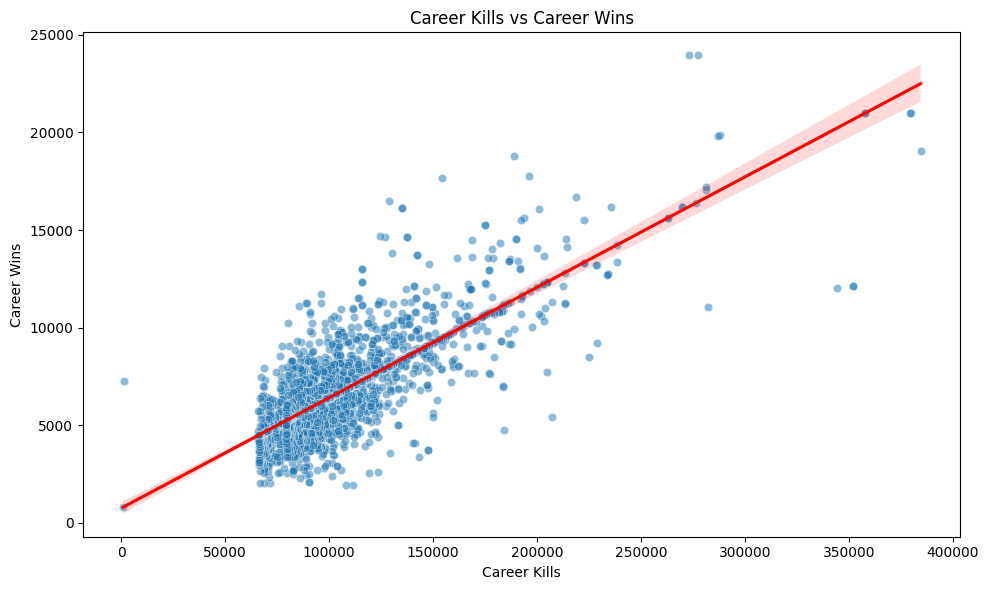

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Career Stats Analysis\Total_Career_Stats.csv')  # Replace with your actual file path

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='career_kills', y='career_wins', data=data, alpha=0.5)
sns.regplot(x='career_kills', y='career_wins', data=data, scatter=False, color='red')
plt.title('Career Kills vs Career Wins')
plt.xlabel('Career Kills')
plt.ylabel('Career Wins')
plt.tight_layout()
plt.savefig('scatter_regression.png')  # Save the plot as an image
plt.show()


The scatter plot illustrates a strong positive relationship between Career Kills and Career Wins, with a regression line indicating that higher kill counts are associated with increased wins.

# 6.2. Residual Plot
Purpose: Assess the assumptions of linearity and homoscedasticity.

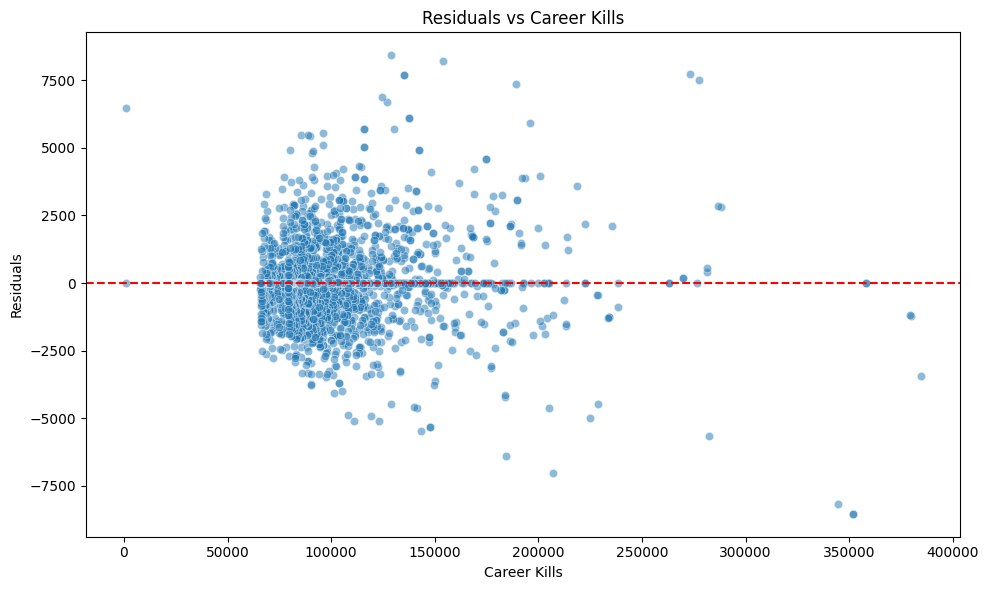

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit the OLS model
X = sm.add_constant(data['career_kills'])
y = data['career_wins']
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['career_kills'], y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Career Kills')
plt.xlabel('Career Kills')
plt.ylabel('Residuals')
plt.tight_layout()
plt.savefig('residual_plot.png')  # Save the plot as an image
plt.show()


Description for Report:
The residual plot shows the residuals scattered around the horizontal axis without any apparent pattern, suggesting linearity. However, the spread of residuals increases with higher kill counts, indicating heteroscedasticity.

# 6.3. Q-Q Plot
Purpose: Assess the normality of residuals.

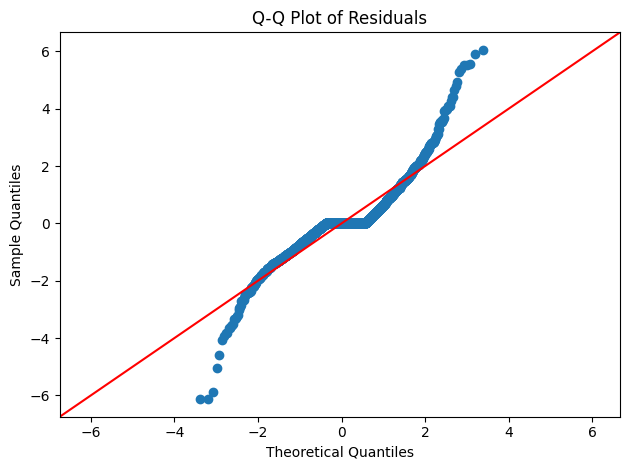

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.savefig('qq_plot.png')  # Save the plot as an image
plt.show()


Description for Report:
The Q-Q plot of residuals deviates significantly from the reference line, indicating that the residuals are not normally distributed.

# 6.4. Correlation Heatmap
Purpose: Visualize the correlations between variables.

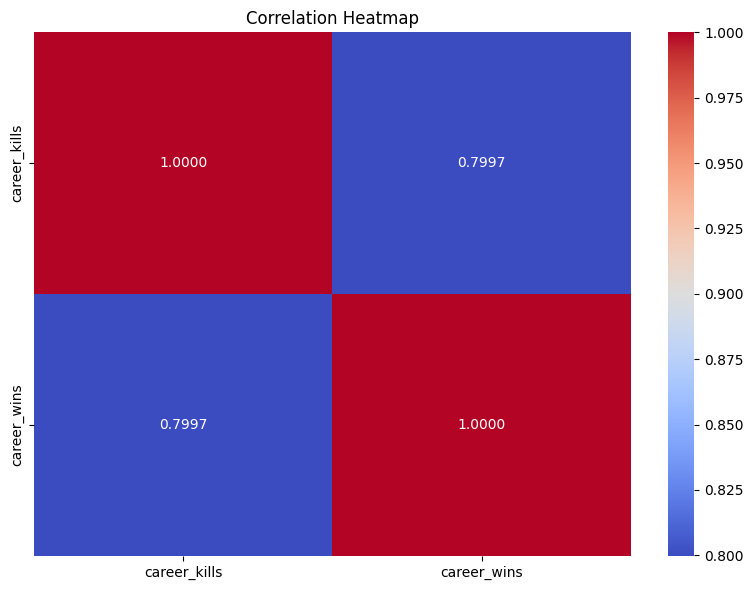

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
corr_matrix = data[['career_kills', 'career_wins']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')  # Save the plot as an image
plt.show()


Description for Report:
The heatmap displays strong positive correlations between Career Kills and Career Wins (0.7997), Career Wins and Career Revives (0.7029), and a moderate correlation between Career Kills and Career Revives (0.6111).

# 6.5. Actual vs. Predicted Career Wins Plot
Purpose: Visualize the accuracy of the regression model.

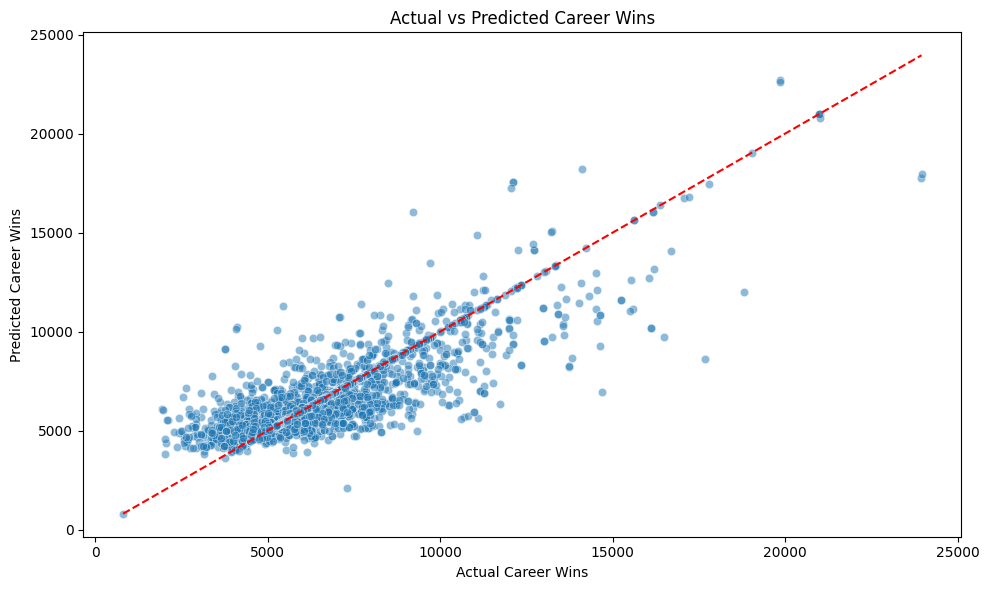

In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define independent variables for multiple regression
X_multi = data[['career_kills', 'career_revives']]
X_multi = sm.add_constant(X_multi)
y = data['career_wins']

# Fit the multiple regression model
model_multi = sm.OLS(y, X_multi).fit()

# Predicted vs Actual
predictions = model_multi.predict(X_multi)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Career Wins')
plt.xlabel('Actual Career Wins')
plt.ylabel('Predicted Career Wins')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')  # Save the plot as an image
plt.show()


Description for Report:
The scatter plot of Actual vs Predicted Career Wins shows a strong alignment along the diagonal line, indicating that the multiple regression model accurately predicts Career Wins based on Career Kills and Career Revives.

